**How to prepare text data for RNN** DO NOT FOR GET TO RUN THE LAST CELL FIRST IF YOU WANT TO TRAIN ON POEMS

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Define text
text = "Time flies like an arrow. Fruit flies like a banana."
#text = poems # DO NOT FOR GET TO RUN THE LAST CELL FIRST
# This line initializes an instance of the Tokenizer class. By default, this tokenizer is set for word-level tokenization,
# meaning it will split text into words and tokenize each unique word.
tokenizer = Tokenizer()
# This line calls fit_on_texts method on the tokenizer object, passing the text as a list.
# This method updates the tokenizer's internal vocabulary based on the text, associating each unique word with a unique integer.
tokenizer.fit_on_texts([text])
# Convert text to a sequence of integers
input_text = tokenizer.texts_to_sequences([text])[0]
print("Word Index:", tokenizer.word_index)
print("Sequence:", input_text)

Word Index: {'flies': 1, 'like': 2, 'time': 3, 'an': 4, 'arrow': 5, 'fruit': 6, 'a': 7, 'banana': 8}
Sequence: [3, 1, 2, 4, 5, 6, 1, 2, 7, 8]


In [52]:
sequence_length = 5
seqquences, labels = [], []

for i in range(sequence_length, len(input_text)):
    # Extract the seqquences and labels
    extract = input_text[i-sequence_length:i+1]
    # Add to lists
    seqquences.append(extract[:-1])
    labels.append(extract[-1])

print("First 5 sequences:", seqquences[:5])
print("First 5 labels:", labels[:5])

First 5 sequences: [[3, 1, 2, 4, 5], [1, 2, 4, 5, 6], [2, 4, 5, 6, 1], [4, 5, 6, 1, 2], [5, 6, 1, 2, 7]]
First 5 labels: [6, 1, 2, 7, 8]


In [53]:

from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoding - Zero-Indexing in Tokenizer:
# In Keras, the Tokenizer object assigns integer indices to words starting from 1, not 0. The index 0 is reserved and not assigned to any word
vocab_size = len(tokenizer.word_index) + 1
labels = to_categorical(labels, num_classes=vocab_size)
print("One-hot encoded labels:", labels[:5])
#print(vocab_size)

One-hot encoded labels: [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


**Simple RNN**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=sequence_length))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))

# Build the model
model.build(input_shape=(None, sequence_length))

# Compile and summarize the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 5, 20)               │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_15 (SimpleRNN)            │ (None, 50)                  │           3,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 9)                   │             459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,189 (16.36 KB)

 Trainable params: 4,189 (16.36 KB)

 Non-trainable params: 0 (0.00 B)

**LSTM**

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=sequence_length))

# Single LSTM layer with 50 units
model.add(LSTM(50, return_sequences=False))

# Output layer
model.add(Dense(vocab_size, activation='softmax'))

# Build the model
model.build(input_shape=(None, sequence_length))

# Compile and summarize the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 5, 20)               │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          14,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 9)                   │             459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839 (57.96 KB)

 Trainable params: 14,839 (57.96 KB)

 Non-trainable params: 0 (0.00 B)

**GRU**

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=sequence_length))

# Single GRU layer with 50 units
model.add(GRU(50, return_sequences=False))

# Output layer
model.add(Dense(vocab_size, activation='softmax'))

# Build the model
model.build(input_shape=(None, sequence_length))

# Compile and summarize the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 5, 20)               │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 9)                   │             459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,439 (44.68 KB)

 Trainable params: 11,439 (44.68 KB)

 Non-trainable params: 0 (0.00 B)

**Bidirectional Simple RNN**

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=sequence_length))

# Bidirectional SimpleRNN layer with 50 units
model.add(Bidirectional(SimpleRNN(50, return_sequences=False)))

# Output layer
model.add(Dense(vocab_size, activation='softmax'))

# Build the model
model.build(input_shape=(None, sequence_length))

# Compile and summarize the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ (None, 5, 20)               │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │           7,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │             909 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,189 (31.99 KB)

 Trainable params: 8,189 (31.99 KB)

 Non-trainable params: 0 (0.00 B)

**Bidirectional Simple LSTM**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=sequence_length))

# Bidirectional LSTM layer with 50 units
model.add(Bidirectional(LSTM(50, return_sequences=False)))

# Output layer
model.add(Dense(vocab_size, activation='softmax'))

# Build the model
model.build(input_shape=(None, sequence_length))

# Compile and summarize the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 5, 20)               │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100)                 │          28,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 9)                   │             909 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,489 (115.19 KB)

 Trainable params: 29,489 (115.19 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:

import numpy as np
# Convert features to numpy array
seqquences = np.array(seqquences)
# Train the model
model.fit(seqquences, labels, epochs=100, batch_size=32)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2000 - loss: 2.1979
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 2.1924
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 2.1869
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4000 - loss: 2.1814
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4000 - loss: 2.1757
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4000 - loss: 2.1699
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4000 - loss: 2.1638
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4000 - loss: 2.1575
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4000 - loss: 2.1509
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4000 - loss: 2.1439
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4000 - loss: 2.1365
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.400

**Test the model here for poem generation**

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def generate_text(seed_text, next_words=50):
    for _ in range(next_words):
        # The current seed_text is converted into a sequence of integers using the tokenizer.
        # Each integer represents a word as per the tokenizer's vocabulary
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # This line ensures that token_list is of a fixed length (sequence_length).
        # If it's shorter, it gets padded with zeros at the beginning. If it's longer, it gets truncated from the beginning.

        token_list = pad_sequences([token_list], maxlen=sequence_length, truncating='pre')
        # Predict the next word
        predictions = model.predict(token_list, verbose=0)
        predicted = np.argmax(predictions, axis=-1)[0]

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word

    return seed_text

generated_text = generate_text("The night")
print(generated_text)


The night fruit flies like a banana banana banana fruit flies like a banana banana banana fruit flies like a banana banana banana fruit flies like a banana banana banana fruit flies like a banana banana banana fruit flies like a banana banana banana fruit flies like a banana banana banana fruit


**Time Series Example**

Timesteps Shape: (1000,)
Data Shape: (1000,)


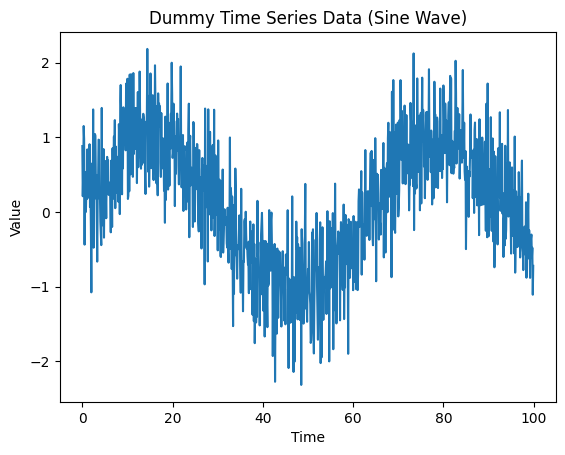

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy time series data (sine wave)
timesteps = np.arange(0, 100, 0.1)
np.random.seed(0)  # For reproducibility
time_steps = np.linspace(0, 10, 1000)
data = np.sin(time_steps) + np.random.normal(scale=0.5, size=time_steps.shape)

# Print the dimensions of the data
print("Timesteps Shape:", timesteps.shape)
print("Data Shape:", data.shape)

# Plotting the data
plt.plot(timesteps, data)
plt.title("Dummy Time Series Data (Sine Wave)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [62]:
sequence_length = 10
features, labels = [], []
for i in range(sequence_length, len(data)):
    features.append(data[i-sequence_length:i])
    labels.append(data[i])

#data=[1,2,3,4,5,6,7,8,9,10]
features = np.array(features)
labels = np.array(labels)

# Reshape features for RNN input
features = np.reshape(features, (features.shape[0], features.shape[1], 1))
# Print the shapes of features and labels

print("Features Shape:", features.shape)
print("Labels Shape:", labels.shape)

#print("features", features)
#print("labels", labels)


Features Shape: (990, 10, 1)
Labels Shape: (990,)


In [63]:
# Split data into training and testing sets
split_index = int(0.8 * len(features))
train_features, test_features = features[:split_index], features[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_17 (SimpleRNN)            │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3660
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2556
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2519
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2738
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2723
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2600
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2648
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2673
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2520
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2534
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2711
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2607
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2540
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2638
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2457
Epo

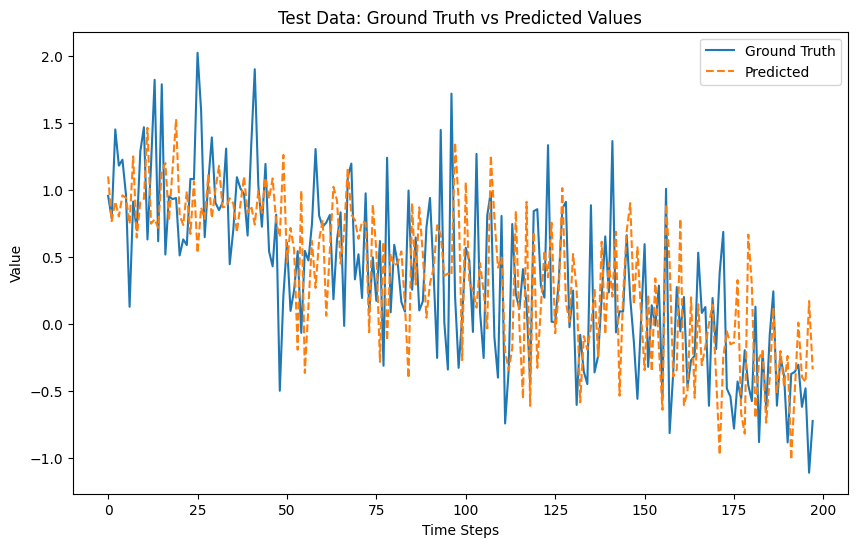

In [64]:

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(sequence_length, 1), return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(train_features, train_labels, epochs=100, batch_size=32, verbose=1)

# Generate predictions for the test set
predicted_values = model.predict(test_features)

# Plot test data ground truth vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_labels)), test_labels, label='Ground Truth')
plt.plot(range(len(predicted_values)), predicted_values, label='Predicted', linestyle='--')
plt.title("Test Data: Ground Truth vs Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

**Poems**
Excerpts from "The Raven" by Edgar Allan Poe and "Ode to a Nightingale" by John Keats. Robert Frost, Dylan Thomas, John Donne, Maya Angelou  
https://poets.org/poem/do-not-go-gentle-good-night
https://www.poetryfoundation.org/poems/47548/acquainted-with-the-night

In [39]:
poems = """
Once upon a midnight dreary while I pondered weak and weary
Over many a quaint and curious volume of forgotten lore
While I nodded nearly napping suddenly there came a tapping
As of some one gently rapping rapping at my chamber door
Tis some visitor I muttered tapping at my chamber door
Only this and nothing more
Ah distinctly I remember it was in the bleak December
And each separate dying ember wrought its ghost upon the floor
Eagerly I wished the morrow vainly I had sought to borrow
From my books surcease of sorrow sorrow for the lost Lenore
For the rare and radiant maiden whom the angels name Lenore
Nameless here for evermore
And the silken sad uncertain rustling of each purple curtain
Thrilled me filled me with fantastic terrors never felt before
So that now to still the beating of my heart I stood repeating
Tis some visitor entreating entrance at my chamber door
Some late visitor entreating entrance at my chamber door
This it is and nothing more
Presently my soul grew stronger hesitating then no longer
Sir said I or Madam truly your forgiveness I implore
But the fact is I was napping and so gently you came rapping
And so faintly you came tapping tapping at my chamber door
That I scarce was sure I heard you here I opened wide the door
Darkness there and nothing more
Deep into that darkness peering long I stood there wondering fearing
Doubting dreaming dreams no mortal ever dared to dream before
But the silence was unbroken and the stillness gave no token
And the only word there spoken was the whispered word Lenore
This I whispered and an echo murmured back the word Lenore
Merely this and nothing more
My heart aches and a drowsy numbness pains my sense
As though of hemlock I had drunk
Or emptied some dull opiate to the drains
One minute past and Lethe-wards had sunk
Tis not through envy of thy happy lot
But being too happy in thine happiness
That thou light-winged Dryad of the trees
In some melodious plot
Of beechen green and shadows numberless
Singest of summer in full-throated ease
O for a draught of vintage that hath been
Cooled a long age in the deep-delved earth
Tasting of Flora and the country green
Dance and Provençal song and sunburnt mirth
O for a beaker full of the warm South
Full of the true the blushful Hippocrene
With beaded bubbles winking at the brim
And purple-stained mouth
That I might drink and leave the world unseen
And with thee fade away into the forest dim
Fade far away dissolve and quite forget
What thou among the leaves hast never known
The weariness the fever and the fret
Here where men sit and hear each other groan
Where palsy shakes a few sad last gray hairs
Where youth grows pale and spectre-thin and dies
Where but to think is to be full of sorrow
And leaden-eyed despairs
Where Beauty cannot keep her lustrous eyes
Or new Love pine at them beyond tomorrow
Do not go gentle into that good night,
Old age should burn and rave at close of day;
Rage, rage against the dying of the light.
Though wise men at their end know dark is right,
Because their words had forked no lightning they
Do not go gentle into that good night.
Good men, the last wave by, crying how bright
Their frail deeds might have danced in a green bay,
Rage, rage against the dying of the light.
Wild men who caught and sang the sun in flight,
And learn, too late, they grieved it on its way,
Do not go gentle into that good night.
Grave men, near death, who see with blinding sight
Blind eyes could blaze like meteors and be gay,
Rage, rage against the dying of the light.
And you, my father, there on the sad height,
Curse, bless, me now with your fierce tears, I pray.
Do not go gentle into that good night.
Rage, rage against the dying of the light.
I have been one acquainted with the night.
I have walked out in rain—and back in rain.
I have outwalked the furthest city light.
I have looked down the saddest city lane.
I have passed by the watchman on his beat
And dropped my eyes, unwilling to explain.
I have stood still and stopped the sound of feet
When far away an interrupted cry
Came over houses from another street,
But not to call me back or say good-bye;
And further still at an unearthly height,
One luminary clock against the sky
Proclaimed the time was neither wrong nor right.
I have been one acquainted with the night.
No man is an island,
Entire of itself,
Every man is a piece of the continent,
A part of the main.
If a clod be washed away by the sea,
Europe is the less.
As well as if a promontory were.
As well as if a manor of thy friend’s
Or of thine own were:
Any man’s death diminishes me,
Because I am involved in mankind,
And therefore never send to know for whom the bell tolls;
It tolls for thee.
Whose woods these are I think I know.
His house is in the village though;
He will not see me stopping here
To watch his woods fill up with snow.
My little horse must think it queer
To stop without a farmhouse near
Between the woods and frozen lake
The darkest evening of the year.
He gives his harness bells a shake
To ask if there is some mistake.
The only other sound’s the sweep
Of easy wind and downy flake.
The woods are lovely, dark and deep,
But I have promises to keep,
And miles to go before I sleep,
And miles to go before I sleep.
You may write me down in history
With your bitter, twisted lies,
You may tread me in the very dirt
But still, like dust, I’ll rise.
Does my sassiness upset you?
Why are you beset with gloom?
’Cause I walk like I’ve got oil wells
Pumping in my living room.
Just like moons and like suns,
With the certainty of tides,
Just like hopes springing high,
Still I’ll rise.
Did you want to see me broken?
Bowed head and lowered eyes?
Shoulders falling down like teardrops.
Weakened by my soulful cries.
Does my haughtiness offend you?
Don’t you take it awful hard
’Cause I laugh like I’ve got gold mines
Diggin’ in my own back yard.
You may shoot me with your words,
You may cut me with your eyes,
You may kill me with your hatefulness,
But still, like air, I’ll rise.
Does my sexiness upset you?
Does it come as a surprise
That I dance like I’ve got diamonds
At the meeting of my thighs?
Out of the huts of history’s shame
I rise
Up from a past that’s rooted in pain
I rise
I’m a black ocean, leaping and wide,
Welling and swelling I bear in the tide.
Leaving behind nights of terror and fear
I rise
Into a daybreak that’s wondrously clear
I rise
Bringing the gifts that my ancestors gave,
I am the dream and the hope of the slave.
I rise
I rise
I rise.

The Wanderer’s Dream

I. The Journey Begins
Through forests deep and mountains high,
Where starlit rivers sing and sigh,
A lone wanderer walks the night,
With heart aflame and spirit light.

Beneath the skies of endless black,
No road ahead, no path to track,
Yet feet find ground, and eyes find sight,
Guided only by whispers light.

Through trees that whisper ancient lore,
Past valleys drenched in twilight’s pour,
His heart beats strong, his gaze held true,
For worlds unknown and paths anew.

II. The Valley of Lost Echoes
In valley low, where shadows drift,
Where winds of sorrow often shift,
He hears the voices of the past,
In murmurs soft, in memories cast.

Here echo all the dreams once lost,
Abandoned, buried, by life’s cost.
Yet now they rise like ghostly song,
Reminding him of right and wrong.

A child’s laugh echoes through the air,
A broken vow, a silent prayer,
The dreams he once left far behind,
Now haunt his heart, now stir his mind.

He bows his head, he sheds a tear,
For all he left, for all he feared.
But soon his feet move on again,
To seek the light, to find the end.

III. The Mountain of Trials
Now mountains rise in jagged peaks,
Their snow-capped summits cold and bleak,
Yet up he climbs with weary soul,
With blistered feet, towards his goal.

The wind is sharp, the rocks are cold,
But still he climbs, both brave and bold.
For every step that strains his will,
He knows it brings him closer still.

A storm descends with thunder’s roar,
It tests his strength, it shakes his core.
Yet in the storm, he finds his might,
And through the darkness, seeks the light.

He slips, he falls, yet up he stands,
With grit of heart, with steady hands.
For in each trial, he finds his fire,
A spark of hope, a deep desire.

IV. The Desert of Reflection
Beyond the mountain lies a land,
Of burning sun and endless sand,
A desert vast, where silence reigns,
Where scorching heat leaves endless pains.

Here solitude is stark and deep,
And secrets in the silence keep.
With no one near, no sound to break,
The wanderer his truth must face.

In mirrors made of shifting sand,
He sees himself, his life unmanned,
The choices made, the paths not tread,
The fears that once filled him with dread.

In barren waste, his heart lays bare,
And all his faults he learns to wear.
No more he hides from shadowed sins,
For healing starts when truth begins.

V. The Oasis of Memory
At last he stumbles, parched and weak,
To find a pool by palm trees sleek.
An oasis rare, a hidden place,
Where cool waters reflect his face.

He drinks the water, cold and pure,
It heals his wounds, it brings a cure.
And as he rests, the past returns,
In gentle waves, his spirit yearns.

He sees his mother’s gentle smile,
His father’s pride, though gone awhile.
The friends who laughed, the love once lost,
The fleeting dreams that came at cost.

Each memory, a balm, a tear,
Yet now he holds them, close and dear.
For every pain, for every scar,
They’ve made him strong, they’ve brought him far.

VI. The Temple of Wisdom
At dawn he rises, strong and new,
With skies now clear, with air now blue.
Ahead, a temple stands alone,
Its ancient walls of weathered stone.

He enters slow, with heart aware,
Of wisdom waiting in the air.
The walls are carved with tales of old,
Of heroes brave, of stories told.

A voice then speaks, both soft and wise,
It echoes deep, it fills the skies:
“To seek the truth, one must endure,
For only pain can make hearts pure.”

“To find the light, you must embrace,
The dark within, the fall from grace.
For only those who lose their way,
Can rise anew, can find the day.”

VII. The Return
With wisdom earned and lessons learned,
The wanderer’s heart, for home it yearned.
Through forests dark, and mountains cold,
He makes his way, both young and old.

The journey’s end is now in sight,
The place where stars once filled his nights.
He finds his home, both strange and known,
With heart at peace, with soul well-grown.

For all he sought was there within,
In every scar, in every sin.
The journey long, the trials endured,
Have shaped his heart, his spirit cured.

And as he stands on ground he knows,
With feet that walked both highs and lows,
He smiles at last, both brave and free,
For he has found his destiny.
The Flame of Ambition

I. The Spark Ignites
In quiet hearts, a whisper stirs,
A seed of dreams, a voice unheard,
A silent pull, a calling deep,
That rouses those who dare to leap.

Ambition wakes, a restless fire,
A spark that grows, a fierce desire,
To rise beyond the known and safe,
To shape a path, to carve a place.

It starts as faint as morning light,
Yet pushes through both day and night,
A flame that hungers, never still,
It fuels the heart, it bends the will.

II. The Climb Begins
With eyes set high, they start the climb,
Against the winds, against the time.
For dreams are mountains, steep and tall,
And those who rise must risk the fall.

The road is rough, the journey long,
But in their hearts, the fire is strong.
For every step, a battle won,
A closer reach toward the sun.

Ambition’s fire burns bright and true,
It drives them forward, through and through.
They scale the cliffs, they brave the night,
They push ahead with all their might.

III. The Shadows of Doubt
But shadows come with whispered fears,
With doubts that chill, with silent tears.
They question all, they tremble low,
They feel the weight of every blow.

“What if the path leads not to light?
What if the climb fades out of sight?
What if my dreams are built on air,
A fool’s pursuit, a hollow dare?”

Yet even as the doubts grow loud,
Ambition stands, both fierce and proud.
For in the heart, the fire remains,
A steady burn despite the pains.

IV. The Price of the Dream
Ambition, too, demands its price,
Of sleepless nights and sacrifice.
For dreams are bought with blood and sweat,
With battles won and losses met.

They miss the dawn, they lose the day,
Their loved ones call, they turn away.
For those who chase the stars so high,
Must often leave their comforts by.

They give their all, they pay the toll,
They feel the weight upon their soul.
Yet still they climb, with hearts ablaze,
Through endless nights and endless days.

V. The Heights Achieved
At last they stand where few have gone,
With golden light, in break of dawn.
The summit high, the world below,
A dream fulfilled, a steady glow.

They see the peaks, the view so wide,
The battles won, the tears they cried.
For every step, they paid the cost,
For every gain, they mourned what’s lost.

Ambition led them to this place,
A testament of human grace.
To strive, to seek, to never yield,
To plow ahead with strength as shield.

VI. The Flame Endures
Yet even now, at journey’s end,
The fire stirs, a restless friend.
For once ambition takes its hold,
It craves new heights, it seeks the bold.

They look again to distant skies,
To other dreams that still may rise.
For those who chase, can never cease,
To climb, to seek, to find new peace.

Ambition’s flame, a gift, a curse,
A blessing deep, a boundless thirst.
For life is short, and dreams are vast,
And those who dare leave echoes cast.

VII. Legacy
One day they’ll rest, their journey done,
Their battles fought, their races run.
But in their wake, the fire remains,
A torch passed on, a light sustained.

For others now will take the path,
Inspired by their steady wrath,
The restless drive, the burning core,
To strive, to seek, to reach for more.

And so ambition lights the way,
Through trials dark, through brightened day.
A flame that guides, a call to rise,
To build, to dream, to touch the skies.
"""